# ENV 790.30 - Time Series Analysis for Energy Data | Spring 2021

## Assignment 2

### Instructor: Luana Lima

### Student Name: Yash Doshi

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
eiats = pd.read_excel("Table_10.1_Renewable_Energy_Production_and_Consumption_by_Source.xlsx", 
                    sheet_name = "Monthly Data", parse_dates = ['Month'])
eiats

,Month,Wood Energy Production (Trillion Btu),Biofuels Production (Trillion Btu),Total Biomass Energy Production (Trillion Btu),Total Renewable Energy Production (Trillion Btu),Hydroelectric Power Consumption (Trillion Btu),Geothermal Energy Consumption (Trillion Btu),Solar Energy Consumption (Trillion Btu),Wind Energy Consumption (Trillion Btu),Wood Energy Consumption (Trillion Btu),Waste Energy Consumption (Trillion Btu),Biofuels Consumption (Trillion Btu),Total Biomass Energy Consumption (Trillion Btu),Total Renewable Energy Consumption (Trillion Btu)
0,1973-01-01,129.630,Not Available,129.787,403.981,272.703,1.491,Not Available,Not Available,129.630,0.157,Not Available,129.787,403.981
1,1973-02-01,117.194,Not Available,117.338,360.900,242.199,1.363,Not Available,Not Available,117.194,0.144,Not Available,117.338,360.900
2,1973-03-01,129.763,Not Available,129.938,400.161,268.810,1.412,Not Available,Not Available,129.763,0.176,Not Available,129.938,400.161
3,1973-04-01,125.462,Not Available,125.636,380.470,253.185,1.649,Not Available,Not Available,125.462,0.174,Not Available,125.636,380.470
4,1973-05-01,129.624,Not Available,129.834,392.141,260.770,1.537,Not Available,Not Available,129.624,0.210,Not Available,129.834,392.141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2020-06-01,180.782,164.111,377.859,1050.542,259.445,17.398,129.862,265.978,171.209,32.965,166.727,370.901,1043.584
570,2020-07-01,185.357,180.789,401.014,1006.388,247.114,18.120,139.094,201.045,178.210,34.868,179.397,392.475,997.849
571,2020-08-01,188.216,179.379,402.983,965.785,215.725,18.078,128.03,200.97,179.668,35.388,174.514,389.570,952.372
572,2020-09-01,182.834,175.381,391.618,894.957,170.798,17.585,108.597,206.359,172.654,33.403,173.836,379.893,883.232


### QUESTION 1

**You will work only with the following columns: Total Biomass Energy Production, Total Renewable Energy Production, Hydroelectric Power Consumption. Create a data frame structure with these three time series only. Use the command head() to verify your data.**

In [3]:
eiats = eiats.loc[:,['Month', 'Total Biomass Energy Production (Trillion Btu)', 'Total Renewable Energy Production (Trillion Btu)', 
               'Hydroelectric Power Consumption (Trillion Btu)']]
eiats

,Month,Total Biomass Energy Production (Trillion Btu),Total Renewable Energy Production (Trillion Btu),Hydroelectric Power Consumption (Trillion Btu)
0,1973-01-01,129.787,403.981,272.703
1,1973-02-01,117.338,360.900,242.199
2,1973-03-01,129.938,400.161,268.810
3,1973-04-01,125.636,380.470,253.185
4,1973-05-01,129.834,392.141,260.770
...,...,...,...,...
569,2020-06-01,377.859,1050.542,259.445
570,2020-07-01,401.014,1006.388,247.114
571,2020-08-01,402.983,965.785,215.725
572,2020-09-01,391.618,894.957,170.798


### QUESTION 2

**Transform your data frame in a time series object and specify the starting point and frequency of the time series using the function ts().**

In [4]:
eiats['Month'] = pd.to_datetime(eiats['Month']) 

In [5]:
eiats.dtypes

Month                                               datetime64[ns]
Total Biomass Energy Production (Trillion Btu)             float64
Total Renewable Energy Production (Trillion Btu)           float64
Hydroelectric Power Consumption (Trillion Btu)             float64
dtype: object

### QUESTION 3

**Compute mean and standard deviation for these three series.**

**MEAN and STANDARD DEVIATION**

***Mean and standard deviation of Total Biomass Energy Production***

***Mean***

In [6]:
a_mean = np.mean(eiats['Total Biomass Energy Production (Trillion Btu)'])
a_mean

270.6961324041811

***Standard Deviation***

In [7]:
a_stdev = np.std(eiats['Total Biomass Energy Production (Trillion Btu)'])
a_stdev

87.28698018429365

***Mean and standard deviation of Total Renewable Energy Production***

***Mean***

In [8]:
b_mean = np.mean(eiats['Total Renewable Energy Production (Trillion Btu)'])
b_mean

572.7320871080142

***Standard Deviation***

In [9]:
b_stdev = np.std(eiats['Total Renewable Energy Production (Trillion Btu)'])
b_stdev

168.3119690759983

***Mean and standard deviation of Hydroelectric Power Consumption***

***Mean***

In [10]:
c_mean = np.mean(eiats['Hydroelectric Power Consumption (Trillion Btu)'])
c_mean

236.9515418118468

***Standard Deviation***

In [11]:
c_stdev = np.std(eiats['Hydroelectric Power Consumption (Trillion Btu)'])
c_stdev

43.86565459033405

### QUESTION 4

**Display and interpret the time series plot for each of these variables. Try to make your plot as informative as possible by writing titles, labels, etc. For each plot add a horizontal line at the mean of each series in a different color.**

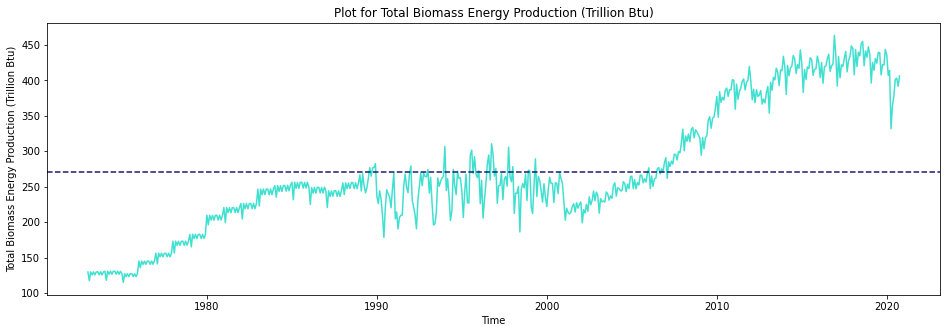

In [12]:
plt.figure(figsize = (16,5))
plt.plot(eiats['Month'], eiats['Total Biomass Energy Production (Trillion Btu)'], color = 'turquoise')
plt.xlabel('Time')
plt.ylabel('Total Biomass Energy Production (Trillion Btu)')
plt.title('Plot for Total Biomass Energy Production (Trillion Btu)')
plt.axhline(a_mean, color = 'midnightblue', linestyle = '--')

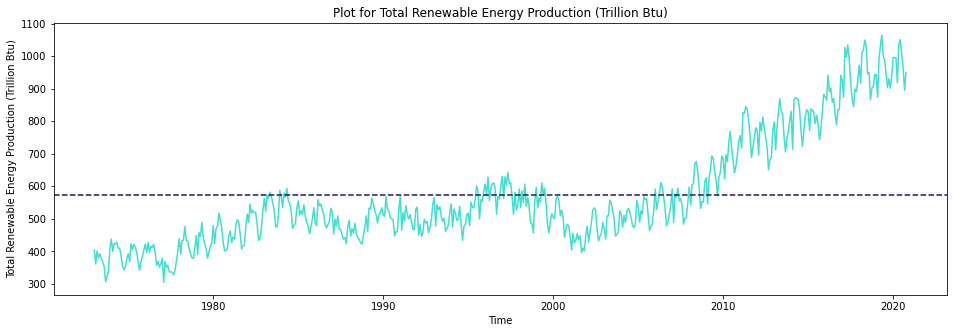

In [13]:
plt.figure(figsize = (16,5))
plt.plot(eiats['Month'], eiats['Total Renewable Energy Production (Trillion Btu)'], color = 'turquoise')        
plt.title('Plot for Total Renewable Energy Production (Trillion Btu)')
plt.xlabel('Time')
plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.axhline(b_mean, color = 'midnightblue', linestyle = '--')

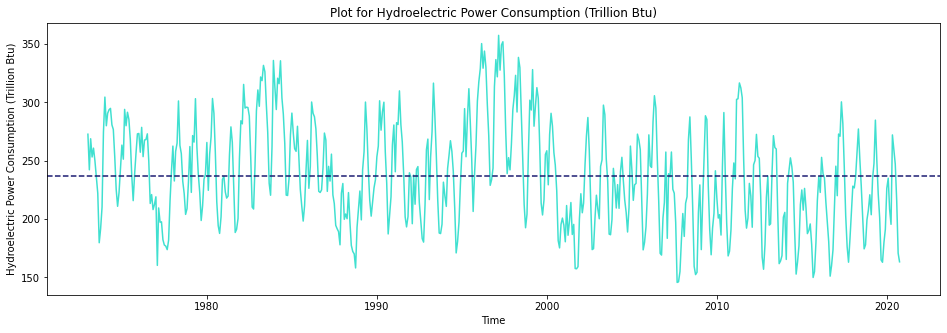

In [14]:
plt.figure(figsize=(16, 5))

plt.plot(eiats['Month'], eiats['Hydroelectric Power Consumption (Trillion Btu)'], color = 'turquoise')
plt.xlabel('Time')
plt.ylabel('Hydroelectric Power Consumption (Trillion Btu)')
plt.title('Plot for Hydroelectric Power Consumption (Trillion Btu)')
plt.axhline(c_mean, color = 'midnightblue', linestyle = '--')


### QUESTION 5

**Compute the correlation between these three series. Are they significantly correlated? Ex- plain your answer.**


*Correlation between Total Biomass Energy Production and Total Renewable Energy Production*

In [15]:
a_corr = np.corrcoef(eiats['Total Biomass Energy Production (Trillion Btu)'],
                     eiats['Total Renewable Energy Production (Trillion Btu)'])
a_corr

array([[1.        , 0.92346085],
       [0.92346085, 1.        ]])

A correlation of 0.92 indicates that there is a strong, positive correlation between Total Biomass Energy Production and Total Renewable Energy Production. It means that both the variables move in the same direction together.

*Correlation between Total Biomass Energy Production and Hydroelectric Power Consumption*

In [16]:
b_corr = np.corrcoef(eiats['Total Biomass Energy Production (Trillion Btu)'],
                     eiats['Hydroelectric Power Consumption (Trillion Btu)'])
b_corr

array([[ 1.        , -0.25556746],
       [-0.25556746,  1.        ]])

A correlation of -0.255 indicates that there is a weak, negative correlation between Total Biomass Energy Production and Hydroelectric Power Consumption. It means that they do not move in the same direction together. This makes sense, because one variable is a measure of production , whereas, the other variable is a measure of consumption. Both these variables are of two completely different energies (one is of biomass, and the other is of hydroelectric).

*Correlation between Total Renewable Energy Production and Hydroelectric Power Consumption*

In [17]:
c_corr = np.corrcoef(eiats['Total Renewable Energy Production (Trillion Btu)'],
                     eiats['Hydroelectric Power Consumption (Trillion Btu)'])
c_corr

array([[ 1.        , -0.00275685],
       [-0.00275685,  1.        ]])

A correlation of -0.0027 indicates a very weak, negative correlation between Total Renewable Energy Production and Hydro- electric Power Consumption. It means that they do not move in the same direction together.

### QUESTION 6

**Compute the autocorrelation function from lag 1 up to lag 40 for these three variables. What can you say about these plots? Do the three of them have the same behavior?**

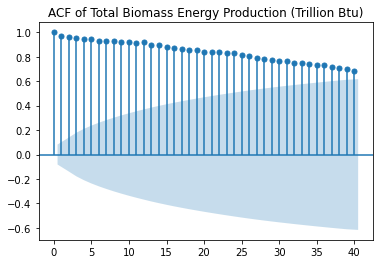

In [18]:
ax = sm.graphics.tsa.plot_acf(eiats['Total Biomass Energy Production (Trillion Btu)'], lags=40,
                        title = 'ACF of Total Biomass Energy Production (Trillion Btu)')

ACF is a measure of dependence between two adjacent values of the same variables. In ACF, we talk about the same variable at different times. This plot tells us how the biomass production at a given time period is related to another time period. For instance, the correlation between first point at lag 1 and second point at lag 2 is 0.972.

Hence, ACF tells us how correlated the points are with each other, based on how many time steps they are separated by. It is how correlated past data points are to the future data points, for different values of time separation.

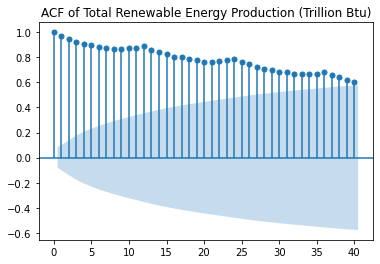

In [19]:
ax = sm.graphics.tsa.plot_acf(eiats['Total Renewable Energy Production (Trillion Btu)'], lags = 40,
                        title = 'ACF of Total Renewable Energy Production (Trillion Btu)')

It can be seen from this plot that there is not much difference in correlation between the total renewable energy production at two separate time periods. In this case, the correlation between first point at lag 1 and second point at lag 2 is 0.966.

If we compare the ACF of total renewable energy production with total biomass energy production, we find that the points at different time intervals are highly autocorrelated in case of biomass energy production than total renewable energy production.

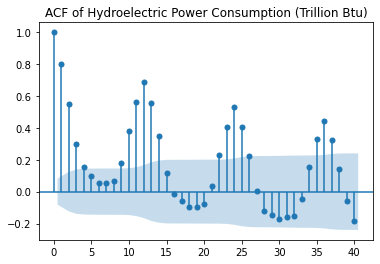

In [20]:
ax = sm.graphics.tsa.plot_acf(eiats['Hydroelectric Power Consumption (Trillion Btu)'], lags = 40, 
                        title = 'ACF of Hydroelectric Power Consumption (Trillion Btu)')

This ACF plot shows that there is very little correlation between the two variables at different time periods. For instance, the correlation between first point at lag 1 and second point at lag 2 is 0.802, and that between the first point and the third point at lag 3 is 0.550.

It should also be noted that ACF for Hydroelectric Power Consumption shows a seasonality. That is the reason why the autocorrelation factor drops, increases, and then drops again.


The three graphs do not showcase the same behavior. The ACF for total biomass energy production and total renewable energy production show a similar trend. The only thing is that the correlation of total renewable energy production is slightly lower than the total biomass energy production. However, the graph for hydroelectric power consumption is completely different than the other two. The hydroelectric power consumption shows a seasonal trend. That is the reason why it is rising, dropping, and then rising again.

### QUESTION 7

**Compute the partial autocorrelation function from lag 1 to lag 40 for these three variables. How these plots differ from the ones in Q6?**

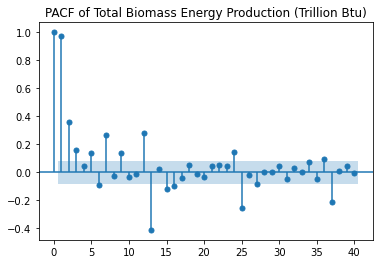

In [21]:
ax = plot_pacf(eiats['Total Biomass Energy Production (Trillion Btu)'], lags=40,
         title = 'PACF of Total Biomass Energy Production (Trillion Btu)')

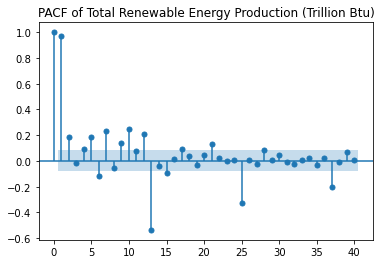

In [22]:
ax = sm.graphics.tsa.plot_pacf(eiats['Total Renewable Energy Production (Trillion Btu)'], lags = 40,
                         title = 'PACF of Total Renewable Energy Production (Trillion Btu)')

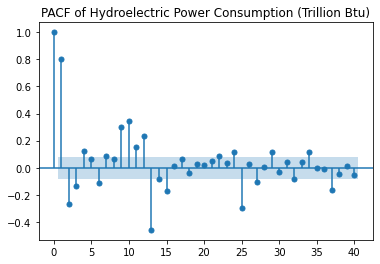

In [23]:
ax = sm.graphics.tsa.plot_pacf(eiats['Hydroelectric Power Consumption (Trillion Btu)'], lags = 40,
                         title = 'PACF of Hydroelectric Power Consumption (Trillion Btu)')

Partial autocorrelation talks about the correlation between two points separated by some time period. PACF does not take into consideration the correlation of the points in-between them. Unlike ACF, the values of PACF try to be as close to zero as possible. PACF is important in order to know how one point is related to some other point in a distant future without the intervening terms.

These plots vary considerably from the plots in Q6. The first plot shows a significant correlation between first and second point, followed by correlations that are not so significant. The pattern of PACF plot for total renewable energy production is similar to the total biomass energy production. The PACF plot for Hydroelectric Power Consumption is the same as its ACF plot.


There is not much we can discover from the PACF plot alone. In order to analyze the data in a better way, we need to use ACF plot too. Together, we can know a lot about the data.